# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Dinesh Gurumoorthy
### Github link:https://github.com/dineshgurum8/620-mod6-web-scraping/tree/master

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the archived Hackaday article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # Raise error if request failed

# Parse HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the article content
article = soup.find('div', class_='entry-content')

if article:
    # Save the HTML of the article to a pickle file
    with open('laser_headlights_article.pkl', 'wb') as f:
        pickle.dump(str(article), f)
    print(" Article content saved to 'laser_headlights_article.pkl'")
else:
    print("Article content not found.")

 Article content saved to 'laser_headlights_article.pkl'


## Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [4]:
import pickle
from bs4 import BeautifulSoup

# Step 1: Load the HTML string from the .pkl file
with open('laser_headlights_article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Step 2: Parse the HTML with BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')

# Step 3: Extract and print plain text
text = soup.get_text(separator='\n', strip=True)
print(text)


When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work in this way

## Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
import pickle
from collections import Counter
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the article HTML from .pkl
with open('laser_headlights_article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Parse HTML to text
from bs4 import BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# Process text with spaCy
doc = nlp(text)

# Filter tokens: no stopwords, no punctuation, no whitespace
tokens = [
    token.text.lower()
    for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]

# Count token frequencies
freqs = Counter(tokens)

# Get 5 most common tokens
most_common = freqs.most_common(5)

# Print results
print("Top 5 most frequent tokens (lowercase, cleaned):")
for token, count in most_common:
    print(f"  Token: '{token}' — Frequency: {count}")

print("\nAll token frequencies (sample):")
for token, count in list(freqs.items())[:10]:  # printing sample first 10 tokens
    print(f"  Token: '{token}' — Frequency: {count}")


Top 5 most frequent tokens (lowercase, cleaned):
  Token: 'laser' — Frequency: 30
  Token: 'headlights' — Frequency: 17
  Token: 'technology' — Frequency: 10
  Token: 'headlight' — Frequency: 10
  Token: 'led' — Frequency: 10

All token frequencies (sample):
  Token: 'think' — Frequency: 1
  Token: 'onward' — Frequency: 1
  Token: 'march' — Frequency: 1
  Token: 'automotive' — Frequency: 6
  Token: 'technology' — Frequency: 10
  Token: 'headlights' — Frequency: 17
  Token: 'usually' — Frequency: 1
  Token: 'thing' — Frequency: 2
  Token: 'come' — Frequency: 5
  Token: 'mind' — Frequency: 3


## Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [8]:
import pickle
from collections import Counter
import spacy
from bs4 import BeautifulSoup

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the article HTML from .pkl
with open('laser_headlights_article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Parse HTML to extract plain text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# Process text with spaCy pipeline
doc = nlp(text)

# Extract lemmas, filter out stopwords, punctuation, whitespace
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get top 5 most common lemmas
top_5 = lemma_freq.most_common(5)

# Print results
print("Top 5 most frequent lemmas (lowercase, cleaned):")
for lemma, freq in top_5:
    print(f"  Lemma: '{lemma}' — Frequency: {freq}")

print("\nSample of lemma frequencies:")
for lemma, freq in list(lemma_freq.items())[:10]:
    print(f"  Lemma: '{lemma}' — Frequency: {freq}")


Top 5 most frequent lemmas (lowercase, cleaned):
  Lemma: 'laser' — Frequency: 35
  Lemma: 'headlight' — Frequency: 26
  Lemma: 'beam' — Frequency: 12
  Lemma: 'technology' — Frequency: 10
  Lemma: 'led' — Frequency: 10

Sample of lemma frequencies:
  Lemma: 'think' — Frequency: 1
  Lemma: 'onward' — Frequency: 1
  Lemma: 'march' — Frequency: 1
  Lemma: 'automotive' — Frequency: 6
  Lemma: 'technology' — Frequency: 10
  Lemma: 'headlight' — Frequency: 26
  Lemma: 'usually' — Frequency: 1
  Lemma: 'thing' — Frequency: 3
  Lemma: 'come' — Frequency: 7
  Lemma: 'mind' — Frequency: 3


## Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [9]:
import pickle
from collections import Counter
import spacy
from bs4 import BeautifulSoup

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the article HTML from .pkl
with open('laser_headlights_article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Extract plain text from HTML
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# Process full text with spaCy
doc = nlp(text)

# -- Question 3 part: frequent tokens
tokens = [
    token.text.lower()
    for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]
token_freqs = Counter(tokens)
frequent_tokens = [token for token, freq in token_freqs.most_common(5)]

# -- Question 4 part: frequent lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]
lemma_freqs = Counter(lemmas)
frequent_lemmas = [lemma for lemma, freq in lemma_freqs.most_common(5)]

# Define scoring functions

def score_sentence_by_token(sentence, interesting_tokens):
    """Return the count of interesting tokens in sentence / number of words."""
    # Filter sentence tokens to exclude punctuation and spaces
    tokens = [token.text.lower() for token in sentence if not (token.is_punct or token.is_space)]
    if not tokens:
        return 0.0
    count = sum(token in interesting_tokens for token in tokens)
    return count / len(tokens)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """Return the count of interesting lemmas in sentence / number of words."""
    lemmas = [token.lemma_.lower() for token in sentence if not (token.is_punct or token.is_space)]
    if not lemmas:
        return 0.0
    count = sum(lemma in interesting_lemmas for lemma in lemmas)
    return count / len(lemmas)

# Test with the first sentence of the article
first_sentence = list(doc.sents)[0]

print("First sentence:")
print(first_sentence.text)

token_score = score_sentence_by_token(first_sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)

print(f"\nScore by tokens (interesting tokens = top 5): {token_score:.3f}")
print(f"Score by lemmas (interesting lemmas = top 5): {lemma_score:.3f}")


First sentence:
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

Score by tokens (interesting tokens = top 5): 0.095
Score by lemmas (interesting lemmas = top 5): 0.095


## Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

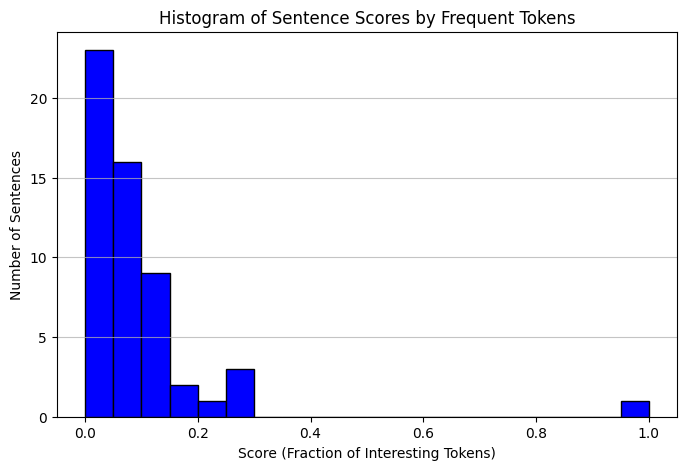

In [12]:
import pickle
from collections import Counter
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the article HTML from .pkl
with open('laser_headlights_article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Extract plain text from HTML
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# Process full text with spaCy
doc = nlp(text)

# -- Reuse frequent tokens from Q3
tokens = [
    token.text.lower()
    for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]
token_freqs = Counter(tokens)
frequent_tokens = [token for token, freq in token_freqs.most_common(5)]

# Reuse scoring function from Q5
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = [token.text.lower() for token in sentence if not (token.is_punct or token.is_space)]
    if not tokens:
        return 0.0
    count = sum(token in interesting_tokens for token in tokens)
    return count / len(tokens)

# Score all sentences
scores = [score_sentence_by_token(sent, frequent_tokens) for sent in doc.sents]

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(scores, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sentence Scores by Frequent Tokens')
plt.xlabel('Score (Fraction of Interesting Tokens)')
plt.ylabel('Number of Sentences')
plt.grid(axis='y', alpha=0.75)
plt.show()


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).